In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate dataset
n_points = 1000
#X = torch.linspace(-2, 2, n_points).view(-1, 1)
#Y = -X**3 + X**2 - X
X = torch.rand(1000,1)
Y = -X**3 + X**2 - X

# Neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Training setup
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training loop
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, Y)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')
'''
# Test the trained model
test_points = torch.linspace(-2, 2, 100).view(-1, 1)
predictions = model(test_points).detach().numpy()

# Plot the function and the model's predictions
plt.plot(X.numpy(), Y.numpy(), label='True function')
plt.plot(test_points.numpy(), predictions, label='Neural network')
plt.legend()
plt.show()
'''

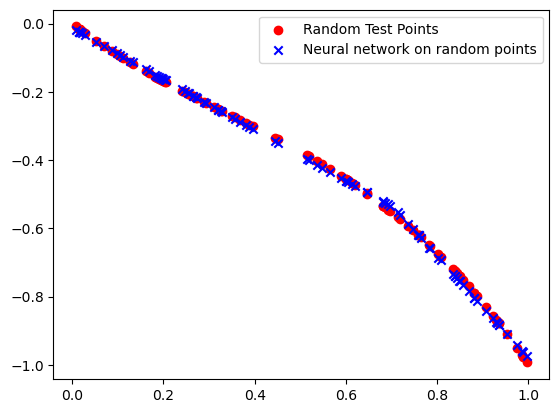

In [2]:
# Generate random test points
n_test_points = 100
test_points = torch.rand(100,1)#4 * torch.rand(n_test_points, 1) - 2  # random values between -2 and 2
test_Y = -test_points**3 + test_points**2 - test_points

predictions = model(test_points).detach().numpy()

# Plot the function and the model's predictions
plt.scatter(test_points.numpy(), test_Y.numpy(), color='red', marker='o', label='Random Test Points')
#plt.plot(X.numpy(), Y.numpy(), label='True function', alpha=0.3)
plt.scatter(test_points.numpy(), predictions, label='Neural network on random points', color='blue', marker='x')
plt.legend()
plt.show()

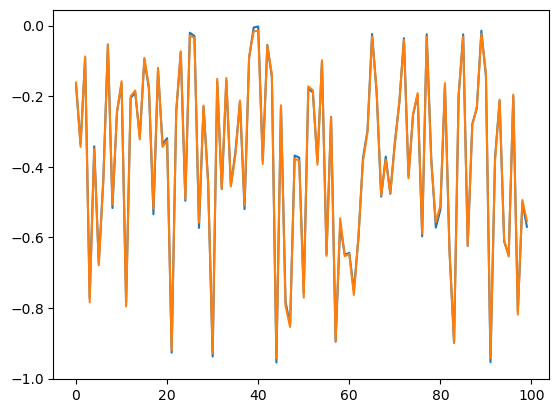

In [3]:
plt.plot(test_Y)
plt.plot(predictions)

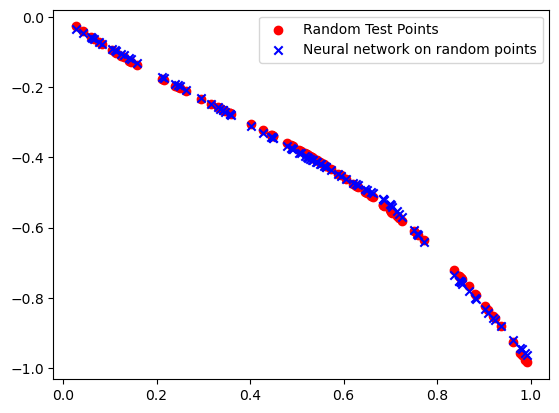

'\nx_test = torch.rand(100,1)\ny_test = -x_test**3 + x_test**2 - x_test\n\noutputs = model(x)\n\nplt.plot(outputs.detach()[:100])\nplt.plot(y_test[:100])\n'

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.rand(1000,1)
y = -x**3 + x**2 - x


model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training loop with early stopping
epochs = 5000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
      

# Generate random test points
n_test_points = 100
test_points = torch.rand(100,1)#4 * torch.rand(n_test_points, 1) - 2  # random values between -2 and 2
test_Y = -test_points**3 + test_points**2 - test_points

predictions = model(test_points).detach().numpy()

# Plot the function and the model's predictions
plt.scatter(test_points.numpy(), test_Y.numpy(), color='red', marker='o', label='Random Test Points')
#plt.plot(X.numpy(), Y.numpy(), label='True function', alpha=0.3)
plt.scatter(test_points.numpy(), predictions, label='Neural network on random points', color='blue', marker='x')
plt.legend()
plt.show()
'''
x_test = torch.rand(100,1)
y_test = -x_test**3 + x_test**2 - x_test

outputs = model(x)

plt.plot(outputs.detach()[:100])
plt.plot(y_test[:100])
'''

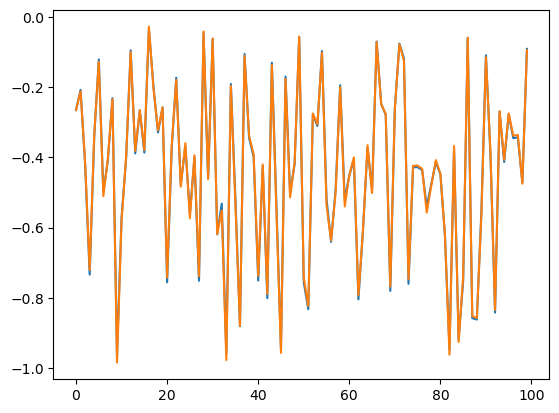

In [4]:
plt.plot(predictions)
plt.plot(test_Y)

Epoch [500/5000], Loss: 0.0001
Epoch [1000/5000], Loss: 0.0001
Epoch [1500/5000], Loss: 0.0001
Epoch [2000/5000], Loss: 0.0001
Epoch [2500/5000], Loss: 0.0001
Epoch [3000/5000], Loss: 0.0001
Epoch [3500/5000], Loss: 0.0001
Epoch [4000/5000], Loss: 0.0001
Epoch [4500/5000], Loss: 0.0001
Epoch [5000/5000], Loss: 0.0001


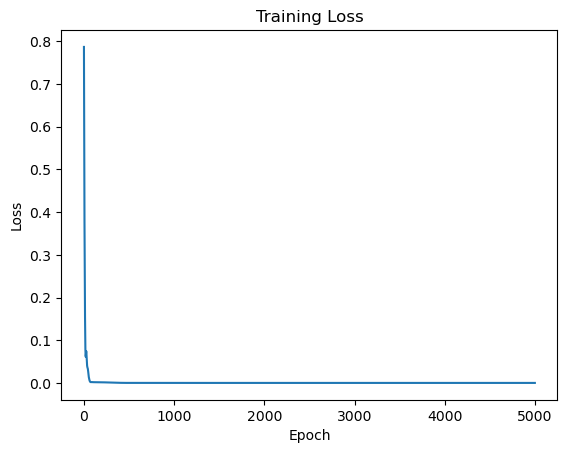

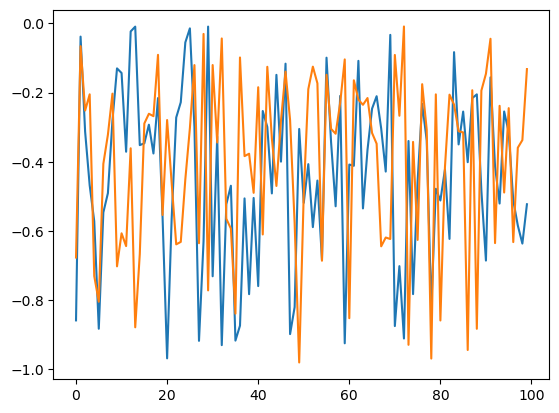

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.rand(1000,1)
y = -x**3 + x**2 - x


model = Net()

# Set hyperparameters
learning_rate = 0.01
num_epochs = 1000

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(x))
val_size = len(x) - train_size
x_train, x_val = torch.split(x, [train_size, val_size])
y_train, y_val = torch.split(y, [train_size, val_size])

# Training loop with early stopping
num_epochs = 5000
patience = 10
best_val_loss = float('inf')
losses = []
early_stopping_counter = 0

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Store loss for visualization
    losses.append(loss.item())
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val)
        val_loss = criterion(val_outputs, y_val)
    model.train()
    
    # Print loss every 500 epochs
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


        
# Plot training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

x_test = torch.rand(100,1)
y_test = -x_test**3 + x_test**2 - x_test

outputs = model(x)

plt.plot(outputs.detach()[:100])
plt.plot(y_test[:100])

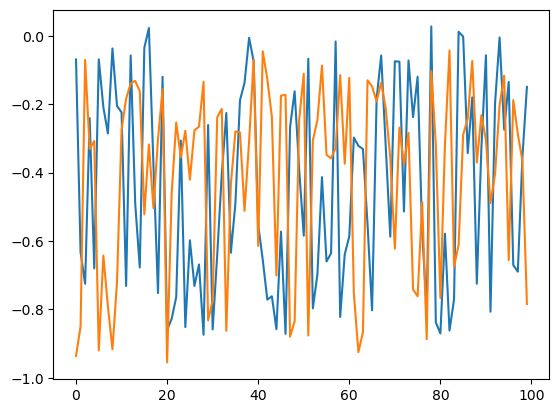

In [7]:
x_test = torch.rand(100,1)
y_test = -x_test**3 + x_test**2 - x_test

outputs = model(x)

plt.plot(outputs.detach()[:100])
plt.plot(y_test[:100])